In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rpy2.robjects.packages import importr
import rpy2
from rpy2 import robjects
import math
import numpy as np

# imports the base module for R.
base = importr("base")
 
# imports the utils package for R.
utils = importr("utils")

df_oubm_coal = pd.read_csv('C:\\Users\\smish\\Documents\\OU\\dataoubm12.csv', names=['Species']+list(range(10)))
df_bmbm_coal = pd.read_csv('C:\\Users\\smish\\Documents\\OU\\databmbm12.csv', names=['Species']+list(range(10)))

In [2]:
df_bmou_coal = pd.read_csv('C:\\Users\\smish\\Documents\\OU\\databmou12.csv', names=['Species']+list(range(10)))
df_ouou_coal = pd.read_csv('C:\\Users\\smish\\Documents\\OU\\dataouou12.csv', names=['Species']+list(range(10)))

In [3]:
df_bmou = pd.read_csv('C:\\Users\\smish\\Documents\\OU\\databmou.csv', names=['Species']+list(range(10)))
df_ouou = pd.read_csv('C:\\Users\\smish\\Documents\\OU\\dataouou.csv', names=['Species']+list(range(10)))

In [4]:
df_oubm = pd.read_csv('C:\\Users\\smish\\Documents\\OU\\dataou.csv', names=['Species']+list(range(10)))
df_bmbm = pd.read_csv('C:\\Users\\smish\\Documents\\OU\\databm.csv', names=['Species']+list(range(10)))


In [5]:
bm = pd.concat([df_oubm,df_bmbm,df_bmou, df_ouou], axis=0)

In [6]:
bm

,Species,0,1,2,3,4,5,6,7,8,9
0,sp1.sp2.sp3sp1.sp2.sp3,(13.1945743566593-0.354538348197047),(13.0876234688306-3.37986792908832),(18.5947448062866-21.1903023119606),(16.0948247350916-9.20951270627583),(12.4867434302715-2.76639014671089),(13.804898029037-0.434526853534944),(18.1227460603443-18.1054086507346),(5.82635013310044-0.300415774663171),(11.5335260456712-0.203798903808272),(13.125680592735-3.42301649832238)
0,sp1.sp2.sp3,(11.1945743566593-0.354538352919069),(12.5067188879849-0.549054655211899),(18.3734874152656-3.88076471128647),(15.8516358998585-1.67433329241721),(12.2522630594485-0.504404959892978),(11.804898029037-0.434526847549068),(16.3345749367027-1.9667742277393),(5.38377827625637-0.051105109469457),(9.53352604567124-0.20379890143022),(11.5845243154875-0.403751597078798)
0,sp1.sp2.sp3,(17.3777784137104-2.78466967188291),(13.578397906258-0.78479639455119),(10.6112679420617-0.291891165940298),(11.9504571344359-0.456129807247321),(14.3207757854671-1.00514154838938),(7.80359594071178-0.114490330506611),(13.265312677918-0.707022576388731),(8.98011093855721-0.169467646713694),(17.0851523613797-2.52587427224512),(10.65954331468-0.296626211553755)
0,sp1.sp2.sp3sp1.sp2.sp3,(17.6651119865796-15.5438641769825),(15.578397906258-0.784796428610673),(12.6112679420617-0.29189117235397),(13.9504571344359-0.456129815827666),(14.9616441456684-6.31236321271482),(8.04330312998214-0.629012853214927),(15.265312677918-0.70702258139846),(9.6195175382253-1.06375087010869),(17.4421837511047-14.4306820508119),(12.65954331468-0.296626216429932)


In [7]:
bm['keys']= keys=['Sim_OU_COAL Infer BM','Sim_OU_COAL Infer OU','Sim_BM_COAL Infer OU','Sim_BM_COAL Infer BM']

In [8]:
bm


,Species,0,1,2,3,4,5,6,7,8,9,keys
0,sp1.sp2.sp3sp1.sp2.sp3,(13.1945743566593-0.354538348197047),(13.0876234688306-3.37986792908832),(18.5947448062866-21.1903023119606),(16.0948247350916-9.20951270627583),(12.4867434302715-2.76639014671089),(13.804898029037-0.434526853534944),(18.1227460603443-18.1054086507346),(5.82635013310044-0.300415774663171),(11.5335260456712-0.203798903808272),(13.125680592735-3.42301649832238),Sim_OU_COAL Infer BM
0,sp1.sp2.sp3,(11.1945743566593-0.354538352919069),(12.5067188879849-0.549054655211899),(18.3734874152656-3.88076471128647),(15.8516358998585-1.67433329241721),(12.2522630594485-0.504404959892978),(11.804898029037-0.434526847549068),(16.3345749367027-1.9667742277393),(5.38377827625637-0.051105109469457),(9.53352604567124-0.20379890143022),(11.5845243154875-0.403751597078798),Sim_OU_COAL Infer OU
0,sp1.sp2.sp3,(17.3777784137104-2.78466967188291),(13.578397906258-0.78479639455119),(10.6112679420617-0.291891165940298),(11.9504571344359-0.456129807247321),(14.3207757854671-1.00514154838938),(7.80359594071178-0.114490330506611),(13.265312677918-0.707022576388731),(8.98011093855721-0.169467646713694),(17.0851523613797-2.52587427224512),(10.65954331468-0.296626211553755),Sim_BM_COAL Infer OU
0,sp1.sp2.sp3sp1.sp2.sp3,(17.6651119865796-15.5438641769825),(15.578397906258-0.784796428610673),(12.6112679420617-0.29189117235397),(13.9504571344359-0.456129815827666),(14.9616441456684-6.31236321271482),(8.04330312998214-0.629012853214927),(15.265312677918-0.70702258139846),(9.6195175382253-1.06375087010869),(17.4421837511047-14.4306820508119),(12.65954331468-0.296626216429932),Sim_BM_COAL Infer BM


In [9]:
robjects.r('''
library(seastaR)
library(ape)
library(dplyr)
library(gtools)
library(combinat)
library(geiger)
library(stringr)

#write.csv(df, "C:\\Users\\smish\\Documents\\OU\\datasets\\Mat.csv", row.names=TRUE,col.names = FALSE)



packageVersion("geiger")
cyp_phy <- read.tree("C:\\Users\\smish\\Documents\\OU\\tests\\/seastaR_sptree_example.txt")




species <- seastaR::parse_input_file("C:\\Users\\smish\\Documents\\OU\\tests\\/seastaR_sptree_example.txt", genetrees = FALSE)



datalist<-list("sp1", "sp2","sp3","sp4", "sp5","sp6","sp7", "sp8","sp9","sp10", "sp11","sp12","sp13", "sp14","sp15","sp16", "sp17","sp18", "sp19","sp20")
C_matrix <- ape::vcv(species) #Standard species tree matrix 


#Cstar_matrix <- seastaR::get_full_matrix(genetree_example) #Gene tree matrix 




#fit_bm <- fitContinuous(tree, states[c("sp1", "sp2","sp3")], model="BM", SE=0)

#print(fit_bm)

#aic_bm <- fit_bm$opt$aic
#siq <- fit_bm$opt$sigsq 


ee_k<-NULL

for (kk in 3:length(datalist)){

dli<-datalist[1:kk]

k<-NULL
for (i in dli){
  
    k<-c(k,i)
    
}

ee_k<-str_c(c(ee_k,str_c(c(k),collapse = "."),collapse=""))


for (i in 1:10)
{
test_trait <- seastaR::simulate_traits(1, C_matrix, 1)
df <- data.frame(test_trait)
#df <-t(df)

cyp_dat <- df


cyp_td <- treedata(cyp_phy, cyp_dat)
states <- cyp_td$data[,"test_trait"]

tree <- cyp_td$phy
states <- states[tree$tip.label]




  fit_bm <- fitContinuous(tree, states[k], model="BM")



  aic_bm <- fit_bm$opt$aic
  siq <- fit_bm$opt$sigsq 
  tmp1 <- str_c(c(",(",str_c(aic_bm),"-",str_c(siq),")"),collapse="")
  ee_k<- str_c(c(ee_k,tmp1),collapse="")

}
ee_k<- str_c(c(ee_k,"\n"),collapse="")
}
write.csv(ee_k, "C:\\Users\\smish\\Documents\\OU\\data.csv", row.names = FALSE)




        ''')



<rpy2.rinterface_lib.sexp.NULLType object at 0x0000016EA0A74E40> [RTYPES.NILSXP]

In [10]:
def fc(df):
    dic={}
    for k in range(len(df)):
        ke=[]
        for j in range(0,len(df.columns)-2):
            ke_=[float(i) for i in str(df.iloc[k][j])[1:-2].split('-')]
            ke.append(ke_)
        dic[list(bm['keys'][0])[k]]=ke
    return dic


In [11]:
def make_df(dic,df):
    result = []
    k=3
    for i in dic.keys():
        df1 =pd.DataFrame(dic[i], columns=['aic','sig_sq'])
        df1["Model"] = i
        result.append(df1)
        k=k+1
    dr = pd.concat(result)  
    return dr

def plot(dr):
    sns.boxplot(x=dr["Model"],y=dr['aic'] )
    plt.xticks(rotation=90)
    plt.show()
    plt.clf()
    
    sns.boxplot(x=dr["Model"],y=dr['sig_sq'] )
    plt.xticks(rotation=90)
    plt.show()
    plt.clf()
    

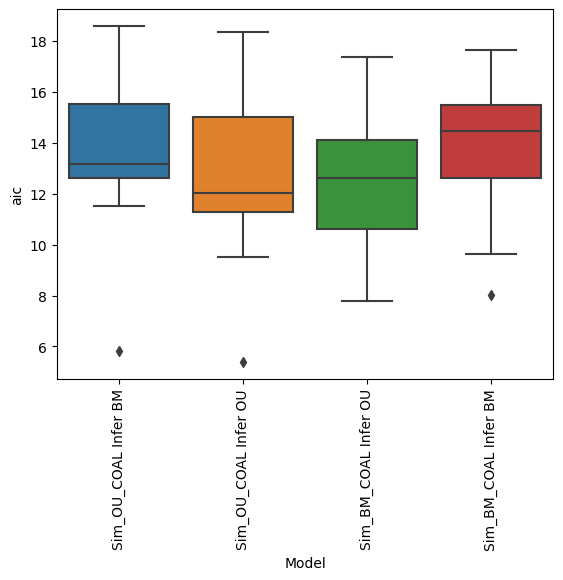

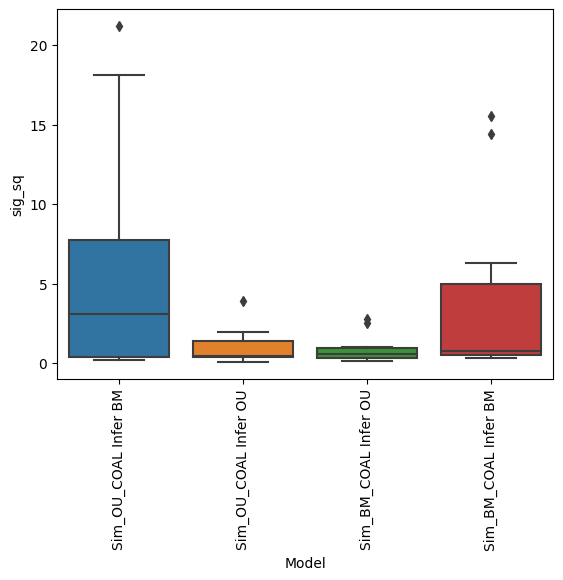

<Figure size 640x480 with 0 Axes>

In [12]:
di1 = fc(bm)
di2_11= make_df(di1,bm)
plot(di2_11)


In [90]:
di2_11

,aic,sig_sq,Model
0,13.194574,0.354538,Sim_OU_COAL Infer BM
1,13.087623,3.379868,Sim_OU_COAL Infer BM
2,18.594745,21.190302,Sim_OU_COAL Infer BM
3,16.094825,9.209513,Sim_OU_COAL Infer BM
4,12.486743,2.766390,Sim_OU_COAL Infer BM
5,13.804898,0.434527,Sim_OU_COAL Infer BM
6,18.122746,18.105409,Sim_OU_COAL Infer BM
7,5.826350,0.300416,Sim_OU_COAL Infer BM
8,11.533526,0.203799,Sim_OU_COAL Infer BM
9,13.125681,3.423016,Sim_OU_COAL Infer BM


In [91]:
dfer = pd.DataFrame()
for i in di1.keys():
    for j in di1.keys():
        ii = i.split()
        jj = j.split()
        if ii[0] == jj[0] and ii[2]!=jj[2]:
            zipped = list(zip(abs(np.subtract(np.array(di1[i]).T[0], np.array(di1[j]).T[0])),abs(np.subtract(np.array(di1[i]).T[1], np.array(di1[j]).T[1])),['_'.join(list({ii[0],ii[2],jj[2]}))]*9))
            ef1 = pd.DataFrame(zipped, columns=['aic','siq_sq','Model'])
            dfer = pd.concat([dfer, ef1], axis=0)
        #sns.boxplot(x=ef1['Model'],y=ef1['aic'] )
        #plt.xticks(rotation=90)
        #plt.show()
        #plt.clf()
    
    

In [92]:
dfer

,aic,siq_sq,Model
0,2.000000,4.722020e-09,Sim_OU_COAL_OU_BM
1,0.580905,2.830813e+00,Sim_OU_COAL_OU_BM
2,0.221257,1.730954e+01,Sim_OU_COAL_OU_BM
3,0.243189,7.535179e+00,Sim_OU_COAL_OU_BM
4,0.234480,2.261985e+00,Sim_OU_COAL_OU_BM
5,2.000000,5.985880e-09,Sim_OU_COAL_OU_BM
6,1.788171,1.613863e+01,Sim_OU_COAL_OU_BM
7,0.442572,2.493107e-01,Sim_OU_COAL_OU_BM
8,2.000000,2.378070e-09,Sim_OU_COAL_OU_BM
0,2.000000,4.722020e-09,Sim_OU_COAL_OU_BM


In [93]:
dfer

,aic,siq_sq,Model
0,2.000000,4.722020e-09,Sim_OU_COAL_OU_BM
1,0.580905,2.830813e+00,Sim_OU_COAL_OU_BM
2,0.221257,1.730954e+01,Sim_OU_COAL_OU_BM
3,0.243189,7.535179e+00,Sim_OU_COAL_OU_BM
4,0.234480,2.261985e+00,Sim_OU_COAL_OU_BM
5,2.000000,5.985880e-09,Sim_OU_COAL_OU_BM
6,1.788171,1.613863e+01,Sim_OU_COAL_OU_BM
7,0.442572,2.493107e-01,Sim_OU_COAL_OU_BM
8,2.000000,2.378070e-09,Sim_OU_COAL_OU_BM
0,2.000000,4.722020e-09,Sim_OU_COAL_OU_BM


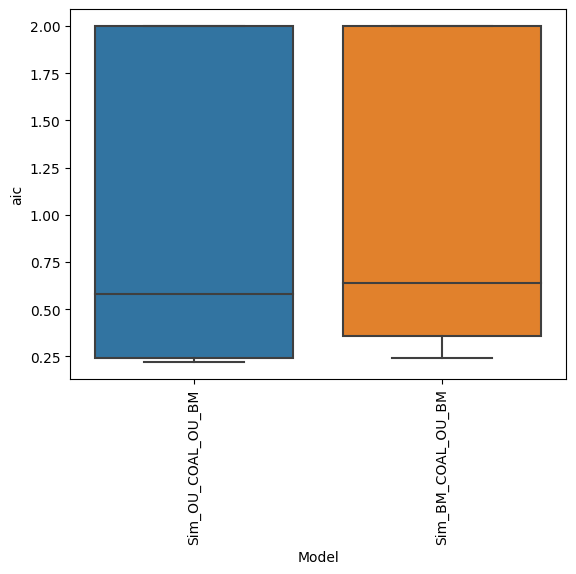

<Figure size 640x480 with 0 Axes>

In [94]:
sns.boxplot(x=dfer['Model'],y=dfer['aic'] )
plt.xticks(rotation=90)
plt.show()
plt.clf()
    

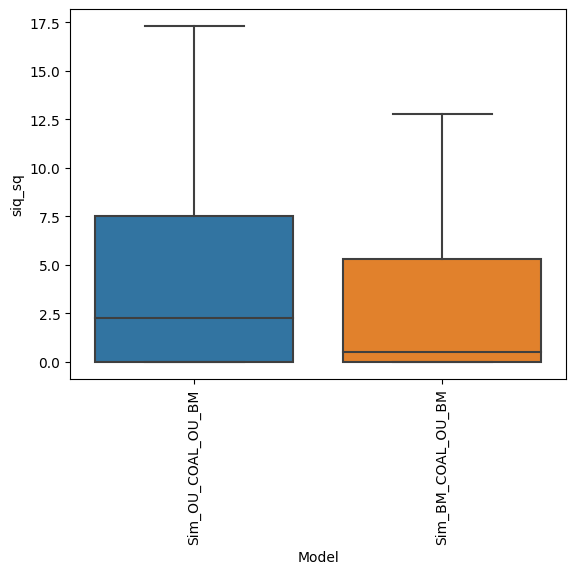

<Figure size 640x480 with 0 Axes>

In [95]:
sns.boxplot(x=dfer['Model'],y=dfer['siq_sq'] )
plt.xticks(rotation=90)
plt.show()
plt.clf()
    